In [1]:
%matplotlib inline
from __future__ import  division
import matplotlib.pyplot as plt
import numpy as np
import math 
import cv2
from IPython.display import display, Image
from scipy.ndimage import filters
from scipy.spatial.distance import cdist,pdist,squareform
from glob import glob

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [87]:
import PIL
images = [ PIL.Image.open(f) for f in glob('blur_data/*') ]

def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

np_images = [ img2array(im) for im in images ]

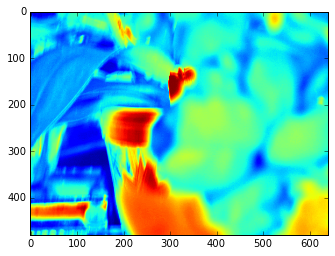

In [3]:
i = PIL.Image.open(r'C:\Users\alvaro.joao.silvino\notebook\Processamento de imagem\blur_data\IMG_0736.jpg')
a = np.array(i.convert('L'))
b = a.sum(0) 
plt.figure()
plt.imshow(a)
# for img in np_images[0:2]:
#     gray = rgb2gray(img)  
#     plt.figure()
#     plt.imshow(gray,cmap = plt.get_cmap('gray'))

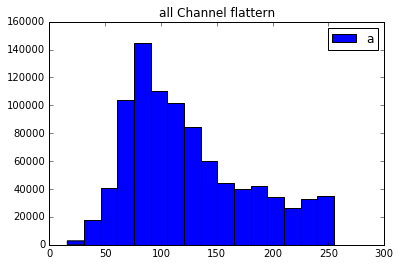

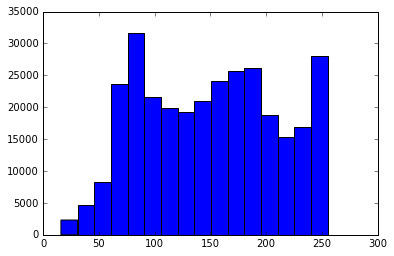

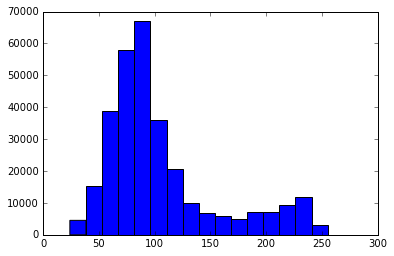

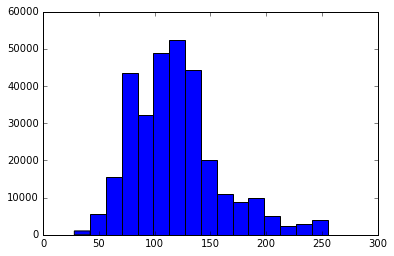

In [4]:
image = np_images[0]
image_R = image[:,:,0]
image_G = image[:,:,1]
image_B = image[:,:,2]

plt.figure()
All_h = plt.hist(image.ravel(), bins=16)
plt.legend('all')
plt.title('all Channel flattern')

plt.figure()
R = plt.hist(image_R.ravel(), bins=16)

plt.figure()
G = plt.hist(image_G.ravel(), bins=16)

plt.figure()
B = plt.hist(image_B.ravel(), bins=16)



In [85]:
image_R = image[:,:,0]
image_G = image[:,:,1]
image_B = image[:,:,2]
ln_image_R = map(math.log1p,image_R.ravel())
gaussina_laplace_ln_image_R =  filters.gaussian_laplace(ln_image_R,2)
gaussina_laplace_ln_image_R = gaussina_laplace_ln_image_R.reshape(image_R.shape)
ln_image_G = map(math.log1p,image_G.ravel())
gaussina_laplace_ln_image_G =  filters.gaussian_laplace(ln_image_G,2)
gaussina_laplace_ln_image_G = gaussina_laplace_ln_image_G.reshape(image_G.shape)
ln_image_B = map(math.log1p,image_B.ravel())
gaussina_laplace_ln_image_B =  filters.gaussian_laplace(ln_image_B,2)
gaussina_laplace_ln_image_B = gaussina_laplace_ln_image_B.reshape(image_B.shape)

dataImage = np.dstack((image_R, image_G, image_B)).astype(np.uint8)
data = np.dstack((gaussina_laplace_ln_image_R, gaussina_laplace_ln_image_G, gaussina_laplace_ln_image_B)).astype(np.float)
data2 = np.vstack((gaussina_laplace_ln_image_R.flat, gaussina_laplace_ln_image_G.flat, gaussina_laplace_ln_image_B.flat)).astype(np.float).T

data2Image = np.dstack((gaussina_laplace_ln_image_R.flat, gaussina_laplace_ln_image_G.flat, gaussina_laplace_ln_image_B.flat)).astype(np.float32)


print image.shape
print dataImage.shape
print data2.shape
data3 = np.vstack((image[:,:,0].flat, image[:,:,1].flat, image[:,:,2].flat)).astype(np.uint8).T
data2 = np.vstack((gaussina_laplace_ln_image_R.flat, gaussina_laplace_ln_image_G.flat, gaussina_laplace_ln_image_B.flat)).astype(np.float).T
H, edges = np.histogramdd(data2, bins = (8, 8, 8))
H2, edges2 = np.histogramdd(data2, bins = (8, 8, 8))


print np.ravel(H)
print np.ravel(H2)

# hist1 = cv2.calcHist([data], [0, 1, 2], None, [16, 16, 16])
# hist2 = cv2.calcHist([data2Image], [0, 1, 2], None, [8, 8, 8],[-0.1, 1,-0.1, 1,-0.1,1])
# print hist2[0]
# print hist2

(480, 640, 3)
(480, 640, 3)
(307200, 3)
[  6.40000000e+01   8.80000000e+01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   1.40000000e+01   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   6.60000000e+01   2.40000000e+01   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.0000000

In [80]:
pdist([All_h[0],R[0],G[0],B[0]])

squareform(pdist([All_h[0],R[0],G[0],B[0]]))

array([[      0.        ,  205743.07441564,  187108.42383495,
         181558.41658816],
       [ 205743.07441564,       0.        ,   76982.74231281,
          68746.53760009],
       [ 187108.42383495,   76982.74231281,       0.        ,
          69206.81152892],
       [ 181558.41658816,   68746.53760009,   69206.81152892,       0.        ]])

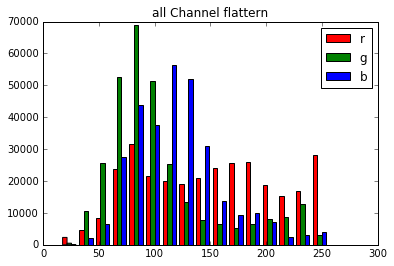

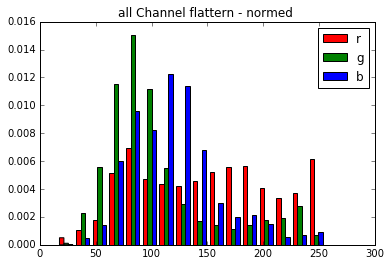

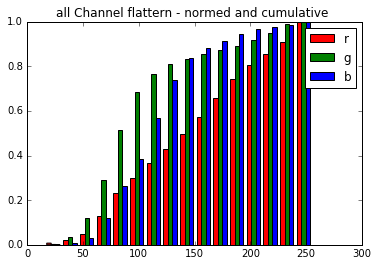

In [6]:

plt.figure()
All_h = plt.hist([image_R.ravel(),image_G.ravel(),image_B.ravel()], bins=16,color=['red','green','blue'])
plt.legend(['r','g','b'])
plt.title('all Channel flattern')


plt.figure()
All_h_normed = plt.hist([image_R.ravel(),image_G.ravel(),image_B.ravel()],normed=True, bins=16,color=['red','green','blue'])
plt.legend(['r','g','b'])
plt.title('all Channel flattern - normed ')




plt.figure()
All_h_normed_cumulative = plt.hist([image_R.ravel(),image_G.ravel(),image_B.ravel()],normed=True,cumulative=True, bins=16,color=['red','green','blue'])
plt.legend(['r','g','b'])
plt.title('all Channel flattern - normed and cumulative ')



In [7]:
print(image_R.ravel())
print(image_G.ravel())
np.divide(np.array(image_R.ravel(),dtype=float),np.array(image_G.ravel(),dtype=float))


[ 46  43  35 ..., 162 162 160]
[ 55  52  46 ..., 207 207 205]


array([ 0.83636364,  0.82692308,  0.76086957, ...,  0.7826087 ,
        0.7826087 ,  0.7804878 ])

In [8]:

np.array(All_h_normed[0]).flatten()

array([  5.05142957e-04,   1.03382148e-03,   1.80504707e-03,
         5.14884066e-03,   6.90790621e-03,   4.70035739e-03,
         4.33642782e-03,   4.18301081e-03,   4.56219491e-03,
         5.24385460e-03,   5.60473326e-03,   5.68405683e-03,
         4.08625349e-03,   3.34401151e-03,   3.68113668e-03,
         6.11881102e-03,   1.10268480e-04,   2.30953626e-03,
         5.58773536e-03,   1.14916754e-02,   1.50307270e-02,
         1.11632671e-02,   5.52344840e-03,   2.90075837e-03,
         1.71678870e-03,   1.39622559e-03,   1.13493724e-03,
         1.40080195e-03,   1.78260112e-03,   1.92599372e-03,
         2.79245119e-03,   6.78390865e-04,   5.23012552e-06,
         4.68314156e-04,   1.45419282e-03,   6.01224721e-03,
         9.57570607e-03,   8.21609135e-03,   1.22700924e-02,
         1.13602685e-02,   6.77889644e-03,   2.96962169e-03,
         2.02035391e-03,   2.15764470e-03,   1.52610704e-03,
         5.40664226e-04,   6.96260460e-04,   8.93915621e-04])

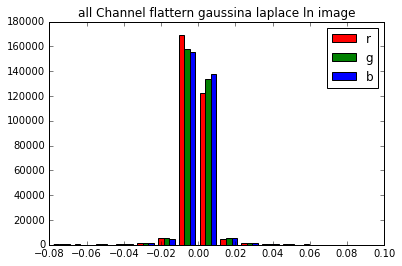

In [9]:
ln_image_R = map(math.log1p,image_R.ravel())
gaussina_laplace_ln_image_R =  filters.gaussian_laplace(ln_image_R,2)

ln_image_G = map(math.log1p,image_G.ravel())
gaussina_laplace_ln_image_G =  filters.gaussian_laplace(ln_image_G,2)

ln_image_B = map(math.log1p,image_B.ravel())
gaussina_laplace_ln_image_B =  filters.gaussian_laplace(ln_image_B,2)

plt.figure()
All_h = plt.hist([gaussina_laplace_ln_image_R,gaussina_laplace_ln_image_G,gaussina_laplace_ln_image_B],
                 bins=16,color=['red','green','blue'])
plt.legend(['r','g','b'])
plt.title('all Channel flattern gaussina laplace ln image')


In [86]:
def getHistogramP(image):
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    ln_image_R = map(math.log1p,image_R.ravel())
    gaussina_laplace_ln_image_R =  filters.gaussian_laplace(ln_image_R,2)

    ln_image_G = map(math.log1p,image_G.ravel())
    gaussina_laplace_ln_image_G =  filters.gaussian_laplace(ln_image_G,2)

    ln_image_B = map(math.log1p,image_B.ravel())
    gaussina_laplace_ln_image_B =  filters.gaussian_laplace(ln_image_B,2)
    
    hist1 = cv2.calcHist([image1], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    
    data2 = np.vstack((gaussina_laplace_ln_image_R.flat, gaussina_laplace_ln_image_G.flat, gaussina_laplace_ln_image_B.flat)).astype(np.float).T
    H, edges = np.histogramdd(data2, bins = (16, 16, 16))

#     plt.figure()
#     All_h = plt.hist([gaussina_laplace_ln_image_R,gaussina_laplace_ln_image_G,gaussina_laplace_ln_image_B],normed=True,
#                      bins=16,color=['red','green','blue'])
#     plt.legend(['r','g','b'])
#     plt.title('all Channel flattern gaussina laplace ln image')
    return np.ravel(H)

    
def getHistogramM(image):
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    ln_image_R_divideG = map(math.log1p,np.divide(np.array(image_R.ravel(),dtype=float),np.array(image_G.ravel(),dtype=float)))
    gaussina_laplace_ln_image_R_divideG =  filters.gaussian_laplace(ln_image_R_divideG,2)

    ln_image_B_divideG = map(math.log1p,np.divide(np.array(image_B.ravel(),dtype=float),np.array(image_G.ravel(),dtype=float)))
    gaussina_laplace_ln_image_B_divideG =  filters.gaussian_laplace(ln_image_B_divideG,2)
    
    data2 = np.vstack((gaussina_laplace_ln_image_R_divideG.flat, gaussina_laplace_ln_image_B_divideG.flat)).astype(np.float).T
    H, edges = np.histogramdd(data2, bins = (16, 16))
    return np.ravel(H)

#     plt.figure()
#     All_h = plt.hist([gaussina_laplace_ln_image_R_divideG,gaussina_laplace_ln_image_B_divideG],
#                      bins=16,color=['red','blue'])
#     plt.legend(['r','b'])
#     plt.title('all Channel flattern gaussina laplace ln image')

    
def getHistogramThip(image):
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    ln_image_R = map(math.log1p,image_R.ravel())
    gaussina_laplace_ln_image_R =  filters.gaussian_laplace(ln_image_R,2)

    ln_image_G = map(math.log1p,image_G.ravel())
    gaussina_laplace_ln_image_G =  filters.gaussian_laplace(ln_image_G,2)

    ln_image_B = map(math.log1p,image_B.ravel())
    gaussina_laplace_ln_image_B =  filters.gaussian_laplace(ln_image_B,2)
    
    thip1 = map(lambda (x,y):math.atan2(x,y),zip(gaussina_laplace_ln_image_R,gaussina_laplace_ln_image_G))
    thip2 = map(lambda (x,y):math.atan2(x,y),zip(gaussina_laplace_ln_image_G,gaussina_laplace_ln_image_B))
    data2 = np.vstack((thip1.flat, thip2.flat)).astype(np.float).T
    H, edges = np.histogramdd(data2, bins = (16, 16))
    return np.ravel(H)
#     plt.figure()
#     All_h = plt.hist([thip1,thip2],
#                      bins=16,color=['red','blue'])
#     plt.legend(['r','b'])
#     plt.title('all Channel flattern gaussina laplace ln image')
#     return All_h
      
def getHistogramThipM(image):
    
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    ln_image_R_divideG = map(math.log1p,np.divide(np.array(image_R.ravel(),dtype=float),np.array(image_G.ravel(),dtype=float)))
    gaussina_laplace_ln_image_R_divideG =  filters.gaussian_laplace(ln_image_R_divideG,2)

    ln_image_B_divideG = map(math.log1p,np.divide(np.array(image_B.ravel(),dtype=float),np.array(image_G.ravel(),dtype=float)))
    gaussina_laplace_ln_image_B_divideG =  filters.gaussian_laplace(ln_image_B_divideG,2)

    
    thipm = map(lambda (x,y):math.atan2(x,y),zip(gaussina_laplace_ln_image_R_divideG,gaussina_laplace_ln_image_B_divideG))
    data2 = np.vstack((thipm.flat)).astype(np.float).T
    H, edges = np.histogramdd(data2, bins = (16))
    return np.ravel(H)
#     plt.figure()
#     All_h = plt.hist([thipm],
#                      bins=16,color=['red'])
#     plt.legend(['r'])
#     plt.title('all Channel flattern gaussina laplace ln image')
#     return All_h
    
      
def getHistogramThipMWithDerivateAndSquare(image):
    
    image_R = image[:,:,0]
    image_G = image[:,:,1]
    image_B = image[:,:,2]
    
    ln_image_R_divideG = map(math.log1p,np.divide(np.array(image_R.ravel(),dtype=float),np.array(image_G.ravel(),dtype=float)))
    gaussina_laplace_ln_image_R_divideG =  filters.gaussian_laplace(ln_image_R_divideG,2)

    ln_image_B_divideG = map(math.log1p,np.divide(np.array(image_B.ravel(),dtype=float),np.array(image_G.ravel(),dtype=float)))
    gaussina_laplace_ln_image_B_divideG =  filters.gaussian_laplace(ln_image_B_divideG,2)

    upPart = map(lambda x:math.pow(x,2),filters.gaussian_laplace(gaussina_laplace_ln_image_R_divideG,2))
    bottonPart = map(lambda (x,y):math.sqrt(math.pow(x,2)+math.pow(y,2)),
                     zip(gaussina_laplace_ln_image_R_divideG,gaussina_laplace_ln_image_B_divideG))
    finalPart = map(lambda (x,y):x/y,zip(upPart,bottonPart))
    data2 = np.vstack((finalPart.flat)).astype(np.float).T
    H, edges = np.histogramdd(data2, bins = (16))
    return np.ravel(H)
#     plt.figure()
#     All_h = plt.hist([finalPart],normed=True,
#                      bins=16,color=['red'])
#     plt.legend(['r'])
#     plt.title('all Channel flattern gaussina laplace ln image')
#     return All_h
    

(array([  1.17385337e+03,   6.53884878e-01,   1.10892757e-01,
          2.67672172e-02,   3.82388818e-03,   1.91194409e-02,
          1.14716645e-02,   1.14716645e-02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.82388818e-03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.82388818e-03]),
 array([  1.32776071e-15,   8.51282303e-04,   1.70256461e-03,
          2.55384691e-03,   3.40512921e-03,   4.25641151e-03,
          5.10769382e-03,   5.95897612e-03,   6.81025842e-03,
          7.66154073e-03,   8.51282303e-03,   9.36410533e-03,
          1.02153876e-02,   1.10666699e-02,   1.19179522e-02,
          1.27692345e-02,   1.36205168e-02]),
 <a list of 16 Patch objects>)

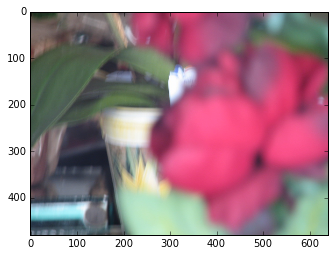

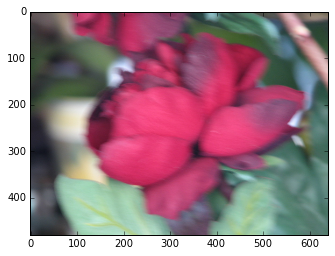

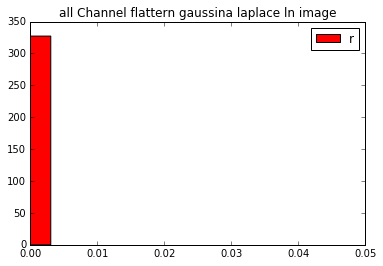

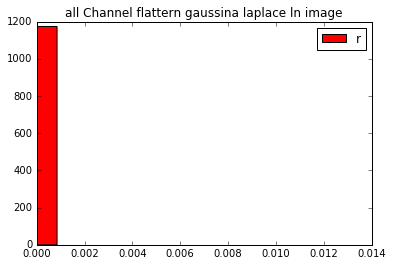

In [59]:
image1 = np_images[0]
image2 = np_images[1]

plt.figure()
plt.imshow(image1)

plt.figure()
plt.imshow(image2)

getHistogramThipMWithDerivateAndSquare(image1)
getHistogramThipMWithDerivateAndSquare(image2)



(array([  1.63763274e+03,   3.28016971e+00,   1.17530511e-01,
          7.47921432e-02,   2.67114797e-02,   1.06845919e-02,
          0.00000000e+00,   5.34229594e-03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          5.34229594e-03]),
 array([  6.03953104e-17,   6.09327594e-04,   1.21865519e-03,
          1.82798278e-03,   2.43731038e-03,   3.04663797e-03,
          3.65596556e-03,   4.26529316e-03,   4.87462075e-03,
          5.48394835e-03,   6.09327594e-03,   6.70260353e-03,
          7.31193113e-03,   7.92125872e-03,   8.53058632e-03,
          9.13991391e-03,   9.74924150e-03]),
 <a list of 16 Patch objects>)

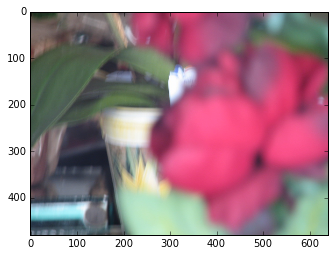

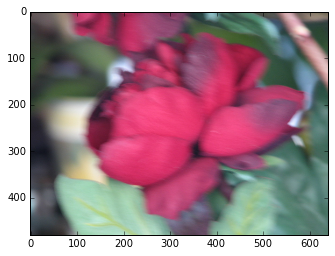

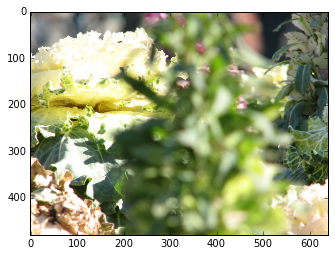

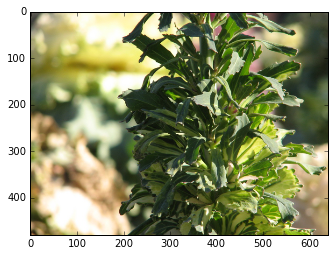

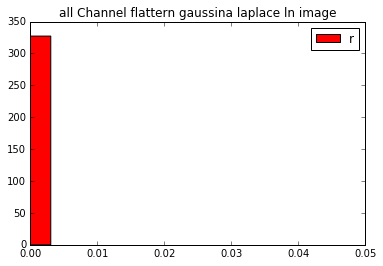

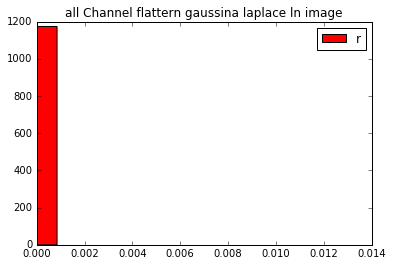

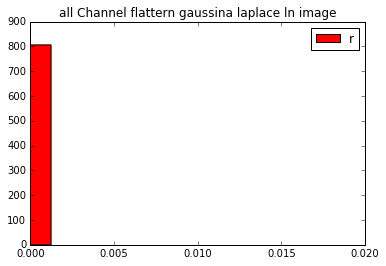

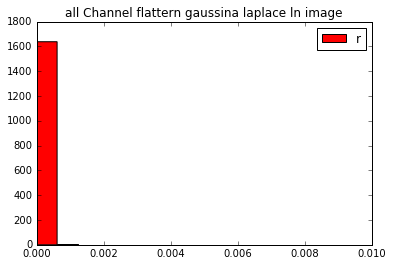

In [60]:
image1 = np_images[0]
image2 = np_images[1]
image3 = np_images[2]
image4 = np_images[3]


plt.figure()
plt.imshow(image1)

plt.figure()
plt.imshow(image2)

plt.figure()
plt.imshow(image3)

plt.figure()
plt.imshow(image4)



getHistogramThipMWithDerivateAndSquare(image1)
getHistogramThipMWithDerivateAndSquare(image2)
getHistogramThipMWithDerivateAndSquare(image3)
getHistogramThipMWithDerivateAndSquare(image4)



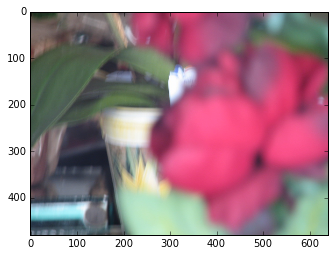

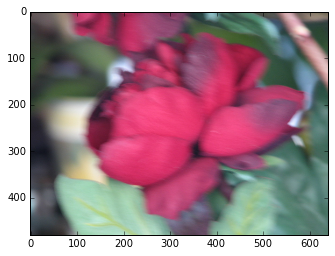

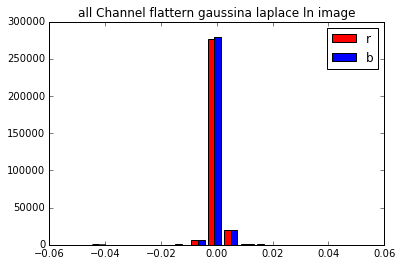

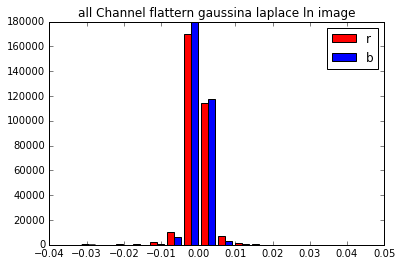

In [61]:
image1 = np_images[0]
image2 = np_images[1]

plt.figure()
plt.imshow(image1)

plt.figure()
plt.imshow(image2)

getHistogramM(image1)
getHistogramM(image2)



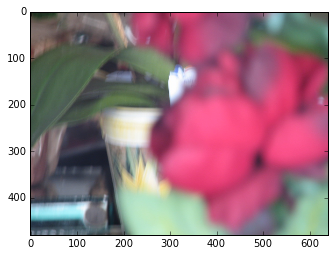

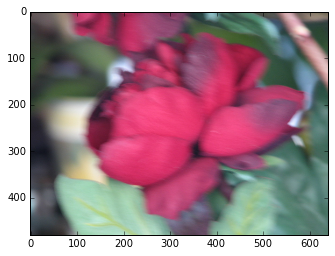

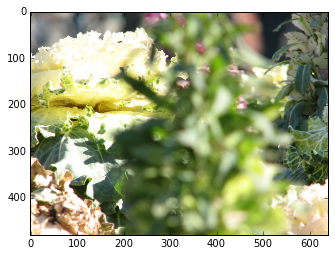

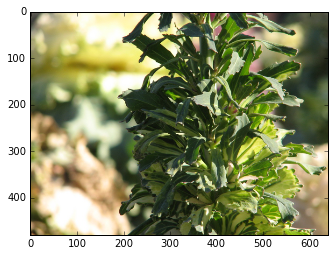

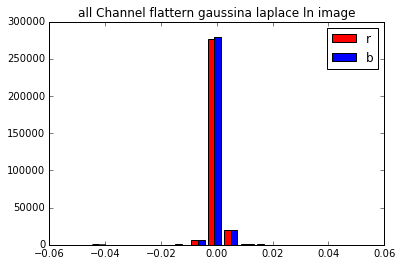

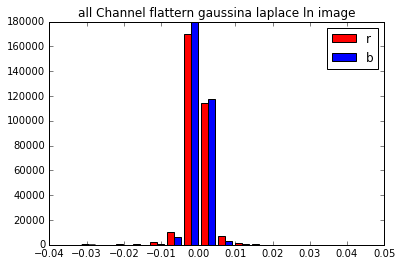

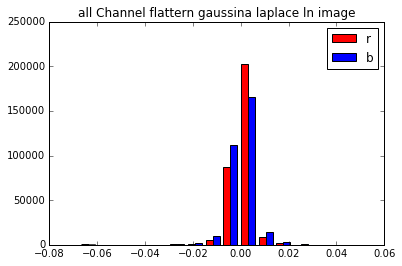

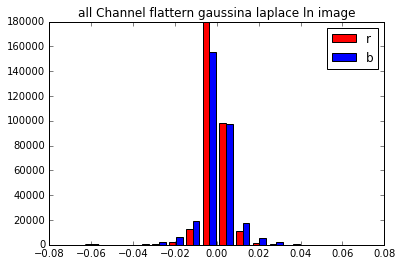

In [62]:
image1 = np_images[0]
image2 = np_images[1]
image3 = np_images[2]
image4 = np_images[3]


plt.figure()
plt.imshow(image1)

plt.figure()
plt.imshow(image2)

plt.figure()
plt.imshow(image3)

plt.figure()
plt.imshow(image4)



getHistogramM(image1)
getHistogramM(image2)
getHistogramM(image3)
getHistogramM(image4)



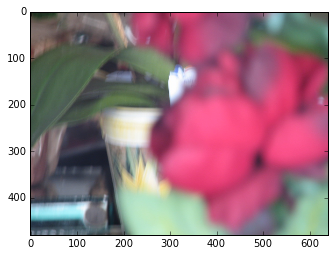

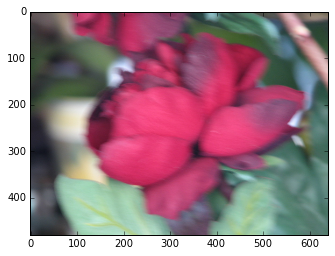

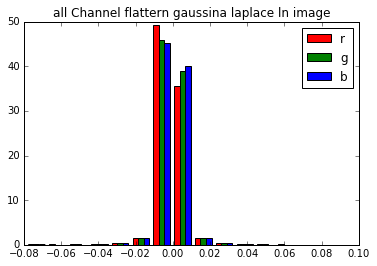

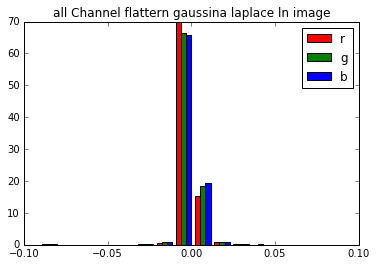

In [63]:
image1 = np_images[0]
image2 = np_images[1]


plt.figure()
plt.imshow(image1)

plt.figure()
plt.imshow(image2)



image1p= getHistogramP(image1)
image2p= getHistogramP(image2)


In [65]:
# print cdist(image1p,image2p)

# squareform(pdist([image1p,image2p]))
print image1p
print image2p

([array([  8.14856378e-03,   7.04268727e-02,   1.08550510e-01,
         2.19720202e-01,   4.52536310e-01,   1.50253696e+00,
         4.91390408e+01,   3.55318124e+01,   1.43327417e+00,
         4.83093424e-01,   2.24085504e-01,   1.12333772e-01,
         8.75970607e-02,   2.12444699e-02,   5.52938257e-03,
         1.45510068e-03]), array([  1.74612081e-03,   3.31762954e-02,   9.54546043e-02,
         1.90036148e-01,   4.36821223e-01,   1.55288344e+00,
         4.58420737e+01,   3.89777818e+01,   1.52523653e+00,
         4.28090619e-01,   1.66754537e-01,   9.34174634e-02,
         3.60864968e-02,   1.22228457e-02,   5.23836243e-03,
         4.36530203e-03]), array([  2.91020135e-04,   1.33869262e-02,   5.79130069e-02,
         2.13608779e-01,   3.90258001e-01,   1.41319378e+00,
         4.52131792e+01,   3.99919870e+01,   1.47896433e+00,
         3.64357209e-01,   1.78977383e-01,   5.82040270e-02,
         1.68791678e-02,   5.52938257e-03,   4.36530203e-03,
         2.91020135e-04])], a

([array([  2570.,  15225.,  61030.,  42266.,  45867.,  55028.,  38458.,
        46756.]), array([    957.,   44547.,  134670.,   62308.,   17943.,   11801.,
         17286.,   17688.])], array([   0.,   32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.]), <a list of 2 Lists of Patches objects>)


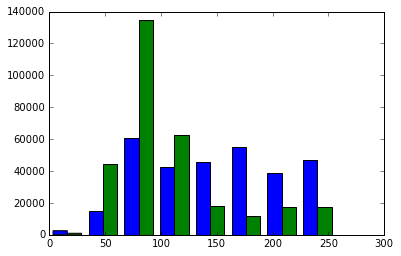

In [162]:
hist1 = cv2.calcHist([image1], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
histPlt = plt.hist([image1[:,:,0],image1[:,:,1]],bins=8,range=(0,256))
# histPlt2d = plt.hist2d(image1[:,:,0],image1[:,:,1],bins=8)

# histPlt = plt.hist([image1[:,:,0],image1[:,:,1]],bins=8,range=(0,256),color=['red','green'])
histnp = np.histogramdd(image1,bins=8,range=(0,256))

# print histnp
print histPlt
# print hist1
# print histPlt2d

# hist1 = cv2.calcHist([image1], [0, 1], None, [8,8],[0, 256, 0, 256])
# hist1 = cv2.normalize(hist).flatten()

# hist2 = cv2.calcHist([image2], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
# hist2 = cv2.normalize(hist).flatten()
# d1 = cv2.compareHist(hist1, hist2, cv2.cv.CV_COMP_CORREL)
# d2 = cv2.compareHist(hist1, hist2, cv2.cv.CV_COMP_CHISQR)
# d3 = cv2.compareHist(hist1, hist2, cv2.cv.CV_COMP_INTERSECT)
# d4 = cv2.compareHist(hist1, hist2, cv2.cv.CV_COMP_BHATTACHARYYA)

# print d1,d2,d3,d4

In [74]:
# hist1 = cv2.calcHist([image1p], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
# hist1 = cv2.normalize(hist).flatten()

# hist2 = cv2.calcHist([image2p], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
# hist2 = cv2.normalize(hist).flatten()
a1= np.float32(np.ravel(image1p[0]))
a2= np.float32(np.ravel(image2p[0]))
d1 = cv2.compareHist(a1,a2, cv2.cv.CV_COMP_CORREL)
d2 = cv2.compareHist(a1, a2, cv2.cv.CV_COMP_CHISQR)
d3 = cv2.compareHist(a1, a2, cv2.cv.CV_COMP_INTERSECT)
d4 = cv2.compareHist(a1, a2, cv2.cv.CV_COMP_BHATTACHARYYA)

print d1,d2,d3,d4

0.576660740346 748.506897079 124.555687261 0.529033859354


In [174]:
r = np.random.randn(100,3)
data = np.vstack((image1[:,:,0].flat, image1[:,:,1].flat, image1[:,:,2].flat)).astype(np.uint8).T
H, edges = np.histogramdd(data, bins = (8, 8, 8),range=((0,256),(0,256),(0,256)))
print H


[[[  2.30000000e+01   8.90000000e+02   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  3.00000000e+00   1.61600000e+03   3.10000000e+01   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   7.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]

In [175]:
print hist1

[[[  2.30000000e+01   8.90000000e+02   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  3.00000000e+00   1.61600000e+03   3.10000000e+01   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   7.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
     0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]